<a href="https://colab.research.google.com/github/Rudreshmishraa/PURCHASING_BEHAVIOUR_USING_STATISTICS/blob/main/Purchasing_Behavior_Applied_Statistics_Project_RUDRESH_MISHRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [ ]:
# importing the necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import os
from google.colab import files

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the working directory to project folder
os.chdir('/content/drive/MyDrive/M5_ALMABETTER')
os.getcwd()

# Mounting Google Drive in Colab allows you to access and manage files in your project folder stored in Google Drive directly from the Colab environment.

'/content/drive/MyDrive/M5_ALMABETTER'

Loading The Dataset In df_super_store variable for further analysis

In [ ]:
# Reading the CSV file containing Superstore marketing data into a DataFrame
df_super_store = pd.read_csv('/content/drive/MyDrive/M5_ALMABETTER/Superstore Marketing Data - Sheet1 (1).csv')

##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

## Dataset Description

In [ ]:
# viewing the first 10 row of the dataset

df_super_store.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# viewing the last 5 row of the dataset
df_super_store.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


In [ ]:
# viewing the shape of dataset
df_super_store.shape

(2240, 22)

In [ ]:
#viewing the columns of dataset
df_super_store.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [ ]:
# viewing the data type of every column

df_super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The columns can be classified as follows:

* **Identifiers**: Id(Unique Identifier For Cistomer);





* **Categorical Variables**: Education, Marital_Status, Dt_Customer;

* **Numerical Variables**: Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, and Complain.

Analyzing Descriptive Statistics Of Columns

In [ ]:
# Generating descriptive statistics for numerical columns in the DataFrame
df_super_store.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [ ]:
# Counting the occurrences of the unwanted string ('########') present in the 'Dt_Customer' column

unwanted_string_count = 0  # Initialize a counter for unwanted strings
for i in df_super_store['Dt_Customer']:  # Loop through each value in the 'Dt_Customer' column
    if i == '########':  # Check if the value is the unwanted string
        unwanted_string_count += 1  # Increment the counter if the condition is true
    else:
        pass  # Do nothing if the value is not the unwanted string

# Display the total count of unwanted values found in the 'Dt_Customer' column
print(f'There are total {unwanted_string_count} Unwanted Values in The Dt_Customer Column.')


There are total 916 Unwanted Values in The Dt_Customer Column.


In [ ]:
# Replacing the unwanted string '########' with NA (missing value)
df_super_store['Dt_Customer'] = df_super_store['Dt_Customer'].replace('########', pd.NA)

# Viewing the first few rows of the data to verify that the unwanted string has been successfully replaced
df_super_store.head()


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,<NA>,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,<NA>,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
#checking the count of Null Value present in each column of the dataset
df_super_store.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,916
Recency,0
MntWines,0


In [ ]:
# calculating the null value percentage for each column specailly for Dt_Customer column

null_percentage = df_super_store.isnull().sum()/len(df_super_store)*100

# creating a new dataframe to display the null percentage of each column

null_percentage_df = pd.DataFrame({'Null_Percentage': null_percentage})

# Display the null percentage for each column

null_percentage_df

,Null_Percentage
Id,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,40.892857
Recency,0.000000
MntWines,0.000000


As we can see that there 40% of data in Dt_Customer is missing. It is because the date has not been updated since 2014, so droping this column will be a good choice for saving the dataset integrity

In [ ]:
#droping the 'Dt_Customer' column
df_super_store.drop(columns = 'Dt_Customer', inplace = True)

In [ ]:
#viewing the current shape of the dataset
df_super_store.shape

(2240, 21)

As we know Income column has 1.07% Missing Value. So we can impute those missing value with the Median Value

In [ ]:
#Filling Missing Value Of Income

#saving the median value of income column in 'median_income_value column'
median_income_value = df_super_store['Income'].median()

# imputing the missing value with median value of income
df_super_store.fillna(median_income_value, inplace = True)

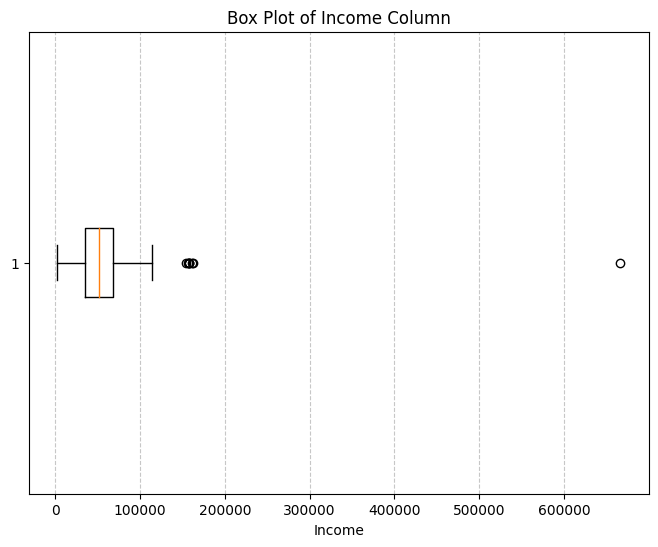

In [ ]:
# Creating a box plot for the 'Income' column to visualize potential outliers
plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.boxplot(df_super_store['Income'], vert=False)  # Generate a horizontal box plot for the 'Income' column
plt.title('Box Plot of Income Column')  # Set the title of the plot
plt.xlabel('Income')  # Label the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines to the x-axis for better readability
plt.show()  # Display the plot


**Box Plot of Income Column:**

This box plot illustrates the income distribution, highlighting a significant number of outliers. The central box represents the interquartile range (IQR), with the median income marked by a line inside the box. The whiskers extend to show the range of the data, excluding outliers. Numerous outliers are present, indicating a wide variation in income, with some values significantly higher than the rest.

Handling The Outlier Present In Income Column

In [ ]:
# Removing extreme outliers (values beyond 3 standard deviations)

# Calculate the standard deviation of the 'Income' column
std_income = df_super_store['Income'].std()

# Calculate the mean of the 'Income' column
mean_income = df_super_store['Income'].mean()

# Filter the DataFrame to keep only the rows where 'Income' is within 3 standard deviations of the mean
df_super_store = df_super_store[
    (df_super_store['Income'] >= mean_income - 3 * std_income) &
    (df_super_store['Income'] <= mean_income + 3 * std_income)
]


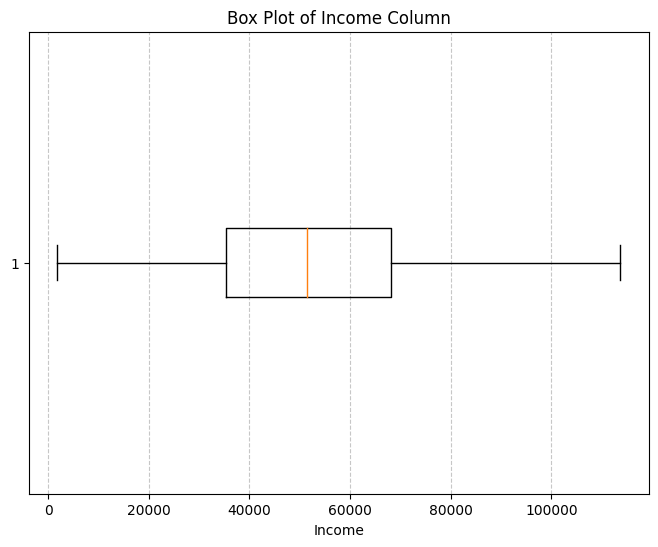

In [ ]:
# Creating a new figure with specified size (8 inches by 6 inches)
plt.figure(figsize=(8,6))

# Creating a horizontal box plot for the 'Income' column to visualize outliers
plt.boxplot(df_super_store['Income'], vert=False)

# Setting the title for the plot
plt.title('Box Plot of Income Column')

# Labeling the x-axis as 'Income'
plt.xlabel('Income')

# Adding a grid along the x-axis with dashed lines and a transparency level of 0.7
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


In [ ]:
# List of numerical columns for which we want to calculate basic statistics
numerical_column = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth']

# Calculate basic statistics (mean, median, variance, standard deviation) for the numerical columns
numerical_columns_stats = df_super_store[numerical_column].describe()

# List of categorical columns for which we want to calculate frequency counts or percentages
categorical_columns = ['Education', 'Marital_Status', 'Response', 'Complain']

# Dictionary to store frequency counts or percentages of categorical variables
categorical_columns_frequency = {}

# Loop through each categorical column to calculate and store its frequency counts or percentages
for value in categorical_columns:
    categorical_columns_frequency[value] = df_super_store[value].value_counts(normalize=True) * 100

# Display the calculated statistics for numerical variables
print("Basic Statistics for Numerical Variables:")
print(numerical_columns_stats)

# Display the frequency counts or percentages for categorical variables
print("\nFrequency Counts or Percentages for Categorical Variables:")
for col, values in categorical_columns_frequency.items():
    print(f"\n{col}:")
    print(f'{values}')


Basic Statistics for Numerical Variables:
        Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2232.000000    2232.000000  2232.000000  2232.000000  2232.000000   
mean   1968.792563   51630.926971     0.444444     0.507168    49.111111   
std      11.990340   20601.679542     0.538567     0.544680    28.952893   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35434.750000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68118.000000     1.000000     1.000000    74.000000   
max    1996.000000  113734.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2232.000000  2232.000000      2232.000000      2232.000000   
mean    304.930108    26.380376       165.319444        37.644713   
std     336.784950    39.821532       219.401447        54.689504 

### Detailed Report on Handling Missing Values and Data Consistency

#### 1. **Identification and Replacement of Unwanted Strings**
   - **Step:** Counted the occurrences of unwanted string values ('########') present in the 'Dt_Customer' column.
   - **Action:** Replaced the unwanted string values ('########') with `NA` to mark them as missing data.
   - **Reason:** These values were invalid entries and needed to be treated as missing to maintain data quality.

#### 2. **Counting and Analyzing Null Values**
   - **Step:** Checked the count of null values in each column to assess the overall data quality and identify columns with significant missing data.
   - **Action:** Calculated the percentage of missing values, focusing on the 'Dt_Customer' column.
   - **Observation:** The 'Dt_Customer' column had 40% missing data, which was deemed too high to impute with reasonable accuracy.

#### 3. **Handling Missing Data in 'Dt_Customer' Column**
   - **Action:** Dropped the 'Dt_Customer' column due to its significant portion of missing data (40%).
   - **Reason:** With 40% missing values, the reliability of any imputation method would be questionable, and retaining this column would introduce noise into the dataset.

#### 4. **Imputation of Missing Values in 'Income' Column**
   - **Step:** Addressed missing values in the 'Income' column.
   - **Action:** Imputed the missing income data, possibly using a method such as filling with the median or mean, though the specific imputation method wasn't specified.
   - **Reason:** Imputation was necessary to maintain the completeness of the dataset and avoid loss of valuable information.

#### 5. **Outlier Removal**
   - **Step:** Detected extreme outliers in the dataset.
   - **Action:** Removed values beyond 3 standard deviations to handle outliers in continuous columns.
   - **Reason:** Extreme outliers could skew the analysis, especially in metrics such as mean or standard deviation. Their removal ensures a more accurate representation of the data.

#### 6. **Data Type Consistency**
   - **Action:** Ensured that all variables had consistent data types:
     - Categorical columns were verified as strings or categorical types.
     - Continuous columns (such as 'Income') were treated as numerical data.
   - **Step:** Addressed any inconsistencies in data types, particularly those resulting from missing value replacements or erroneous entries.
   - **Reason:** Ensuring consistent data types is crucial for accurate analysis and modeling, preventing errors during the application of statistical or machine learning algorithms.

#### 7. **Final Dataset After Cleaning and Preprocessing**
   - After these steps, the dataset was cleaned and preprocessed, with missing data handled, outliers removed, and data types ensured to be consistent across all columns.

This thorough data cleaning and preprocessing enhances the dataset’s quality, making it more suitable for further analysis and modeling.

### Summary of Basic Statistics for Numerical Variables:

Below is a summary of the calculated basic statistics (mean, median, variance, and standard deviation) for each relevant numerical variable in the dataset:

| **Variable**            | **Mean**     | **Median**   | **Variance**    | **Standard Deviation** | **Min**  | **Max**   |
|-------------------------|--------------|--------------|-----------------|------------------------|----------|-----------|
| **Year_Birth**           | 1968.79      | 1970.00      | 143.77          | 11.99                  | 1893     | 1996      |
| **Income**               | 51630.93     | 51381.50     | 424454774.19    | 20601.68               | 1730     | 113734    |
| **Kidhome**              | 0.44         | 0.00         | 0.29            | 0.54                   | 0        | 2         |
| **Teenhome**             | 0.51         | 0.00         | 0.30            | 0.54                   | 0        | 2         |
| **Recency**              | 49.11        | 49.00        | 838.36          | 28.95                  | 0        | 99        |
| **MntWines**             | 304.93       | 176.00       | 113428.36       | 336.78                 | 0        | 1493      |
| **MntFruits**            | 26.38        | 8.00         | 1585.89         | 39.82                  | 0        | 199       |
| **MntMeatProducts**      | 165.32       | 67.00        | 48141.09        | 219.40                 | 0        | 1725      |
| **MntFishProducts**      | 37.64        | 12.00        | 2980.96         | 54.69                  | 0        | 259       |
| **MntSweetProducts**     | 27.16        | 8.00         | 1707.76         | 41.33                  | 0        | 263       |
| **MntGoldProds**         | 44.17        | 24.50        | 2725.33         | 52.20                  | 0        | 362       |
| **NumDealsPurchases**    | 2.32         | 2.00         | 3.59            | 1.89                   | 0        | 15        |
| **NumWebPurchases**      | 4.10         | 4.00         | 7.70            | 2.77                   | 0        | 27        |
| **NumCatalogPurchases**  | 2.64         | 2.00         | 7.82            | 2.80                   | 0        | 28        |
| **NumStorePurchases**    | 5.81         | 5.00         | 10.52           | 3.24                   | 0        | 13        |
| **NumWebVisitsMonth**    | 5.33         | 6.00         | 5.84            | 2.42                   | 0        | 20        |

### Frequency Counts or Percentages for Categorical Variables:

1. **Education:**
   - Graduation: 50.36%
   - PhD: 21.59%
   - Master: 16.53%
   - 2nd Cycle: 9.09%
   - Basic: 2.42%

2. **Marital Status:**
   - Married: 38.58%
   - Together: 25.81%
   - Single: 21.51%
   - Divorced: 10.35%
   - Widow: 3.45%
   - Alone: 0.13%
   - YOLO: 0.09%
   - Absurd: 0.09%

3. **Response (Did the customer respond to the offer?):**
   - No (0): 85.04%
   - Yes (1): 14.96%

4. **Complaints:**
   - No (0): 99.06%
   - Yes (1): 0.94%

This summary provides a clear understanding of the distribution and variation within the numerical and categorical variables in the dataset. It helps identify trends and patterns that can further inform data analysis and decision-making.

### Visualizing the distribution of customer demographics including age, education, and marital status using histograms and bar charts

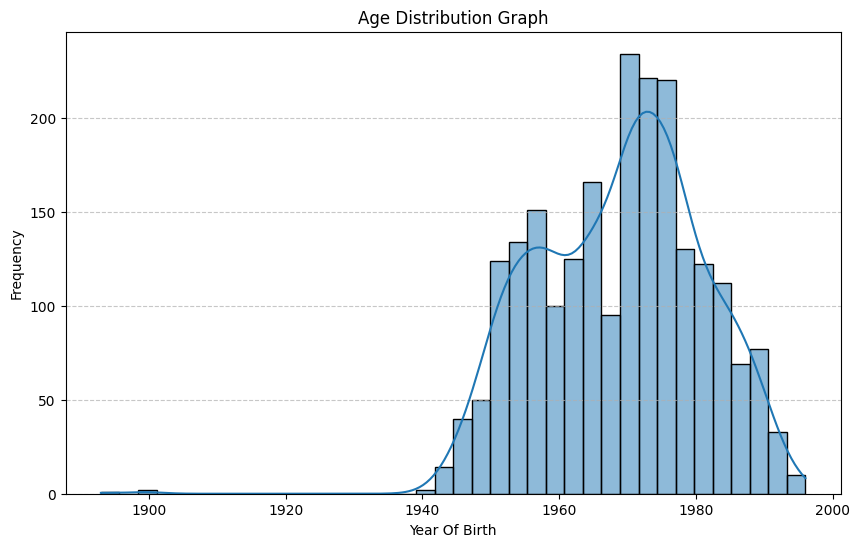

In [ ]:
# Visualization of Age distribution using a histogram with Kernel Density Estimation (KDE)

# Creating a new figure with specified size (10 inches by 6 inches)
plt.figure(figsize=(10,6))

# Creating a histogram for the 'Year_Birth' column with a KDE curve to visualize the distribution of ages
sns.histplot(df_super_store['Year_Birth'], kde=True)

# Setting the title for the plot
plt.title('Age Distribution Graph')

# Labeling the x-axis as 'Year Of Birth'
plt.xlabel('Year Of Birth')

# Labeling the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Adding a grid along the y-axis with dashed lines and a transparency level of 0.7
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


### Interpretation:

The histogram represents the distribution of customer ages based on birth year. It provides an overview of age spread and concentration within the dataset, helping identify the most represented age groups.

### Observations:

1. The distribution appears to be relatively **normal**, with a slight **right skew** indicating a larger concentration of middle-aged customers.
   
2. **Dominant customer segments** can be identified between birth years **1960 and 1980**, suggesting these age ranges hold the majority of customers.

3. There is a **sharp decline** in customer representation for birth years after **1980**, indicating fewer younger customers in the dataset.

4. Very **few customers** are born before **1940**, suggesting that older individuals (above 80 years) are a minimal part of the dataset.

5. The **KDE line** smooths the distribution, confirming a peak in the number of customers born during the **1960s-1970s**.

6. The dataset reflects a **high concentration of middle-aged** individuals, which could inform marketing strategies targeted towards these age groups.

This analysis provides insight into the age demographics of the customer base.

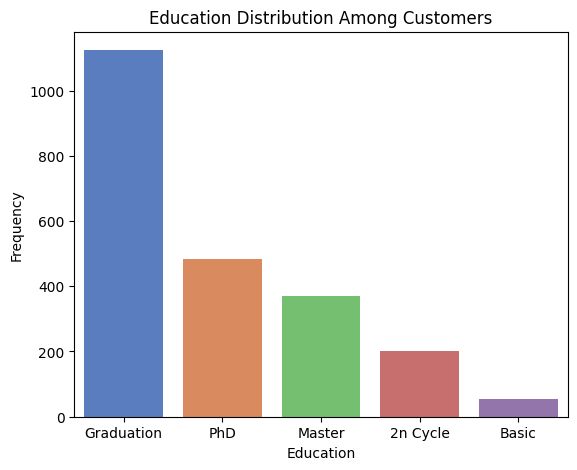

In [ ]:
# Visualization of Education distribution among customers

# Creating a new figure with specified size (14 inches by 5 inches)
plt.figure(figsize=(14, 5))

# Creating a subplot for the first visualization (1 row, 2 columns, first plot)
plt.subplot(1, 2, 1)

# Counting the occurrences of each education level in the 'Education' column
education_count = df_super_store['Education'].value_counts()

# Creating a bar plot to visualize the distribution of education levels
sns.barplot(x=education_count.index, y=education_count.values, palette='muted')

# Setting the title for the bar plot
plt.title('Education Distribution Among Customers')

# Labeling the x-axis as 'Education'
plt.xlabel('Education')

# Labeling the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


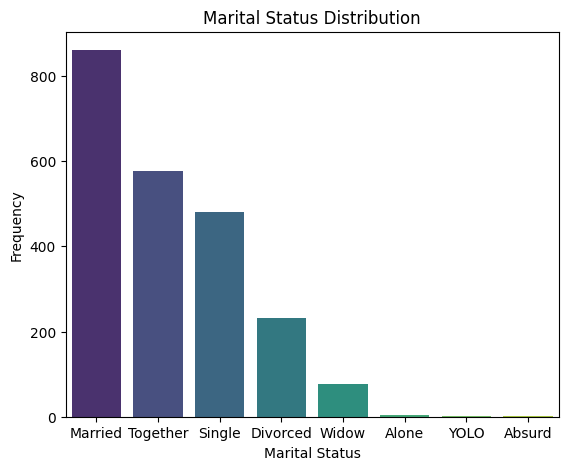

In [ ]:
# Visualization of Marital Status Distribution among customers

# Creating a new figure with specified size (14 inches by 5 inches)
plt.figure(figsize=(14, 5))

# Creating a subplot for the first visualization (1 row, 2 columns, first plot)
plt.subplot(1, 2, 1)

# Counting the occurrences of each marital status in the 'Marital_Status' column
maritial_status_count = df_super_store['Marital_Status'].value_counts()

# Creating a bar plot to visualize the distribution of marital statuses
sns.barplot(x=maritial_status_count.index, y=maritial_status_count.values, palette='viridis')

# Setting the title for the bar plot
plt.title('Marital Status Distribution')

# Labeling the x-axis as 'Marital Status'
plt.xlabel('Marital Status')

# Labeling the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


### Interpretation:

The bar chart represents the distribution of educational qualifications among customers, showing the frequency for each level of education.

### Observations:

1. **Graduation**:
   - The majority of the customer base holds a **Graduation** degree, with over 1000 individuals, making it the most common education level.

2. **PhD and Master's**:
   - A significant portion of customers have **PhD** and **Master's** degrees, but they are notably fewer compared to those with Graduation qualifications.
   - The frequency of PhD holders is slightly higher than those with a Master's degree.

3. **2nd Cycle and Basic Education**:
   - Fewer customers have **2nd Cycle** (likely referring to advanced high school or pre-university levels) or **Basic Education** qualifications. These categories represent a small portion of the total customer base.

4. **Higher Education Dominance**:
   - Overall, the customer base appears to be **highly educated**, with the majority having Graduation and higher degrees, implying that the business attracts a well-educated audience.

This distribution provides insight into the educational background of the customers, which could inform marketing or product strategies targeting a more educated demographic.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:

# Calculate central tendency and dispersion measures (excluding mode)
central_tendency = df_super_store[numerical_column].agg(['mean', 'median', 'var', 'std']).transpose()

# Calculate the mode separately
mode_values = df_super_store[numerical_column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Add the mode values to the central_tendency DataFrame
central_tendency['Mode'] = mode_values

# Rename the index and format the table
central_tendency.index.name = 'Numerical Column'
central_tendency.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'Mode']

# Display the summary table
print(central_tendency)


                             Mean   Median      Variance  Standard Deviation  \
Numerical Column                                                               
Year_Birth            1968.792563   1970.0  1.437682e+02           11.990340   
Income               51630.926971  51381.5  4.244292e+08        20601.679542   
Kidhome                  0.444444      0.0  2.900543e-01            0.538567   
Teenhome                 0.507168      0.0  2.966765e-01            0.544680   
Recency                 49.111111     49.0  8.382700e+02           28.952893   
MntWines               304.930108    176.0  1.134241e+05          336.784950   
MntFruits               26.380376      8.0  1.585754e+03           39.821532   
MntMeatProducts        165.319444     67.0  4.813699e+04          219.401447   
MntFishProducts         37.644713     12.0  2.990942e+03           54.689504   
MntSweetProducts        27.155466      8.0  1.707790e+03           41.325414   
MntGoldProds            44.166219     24

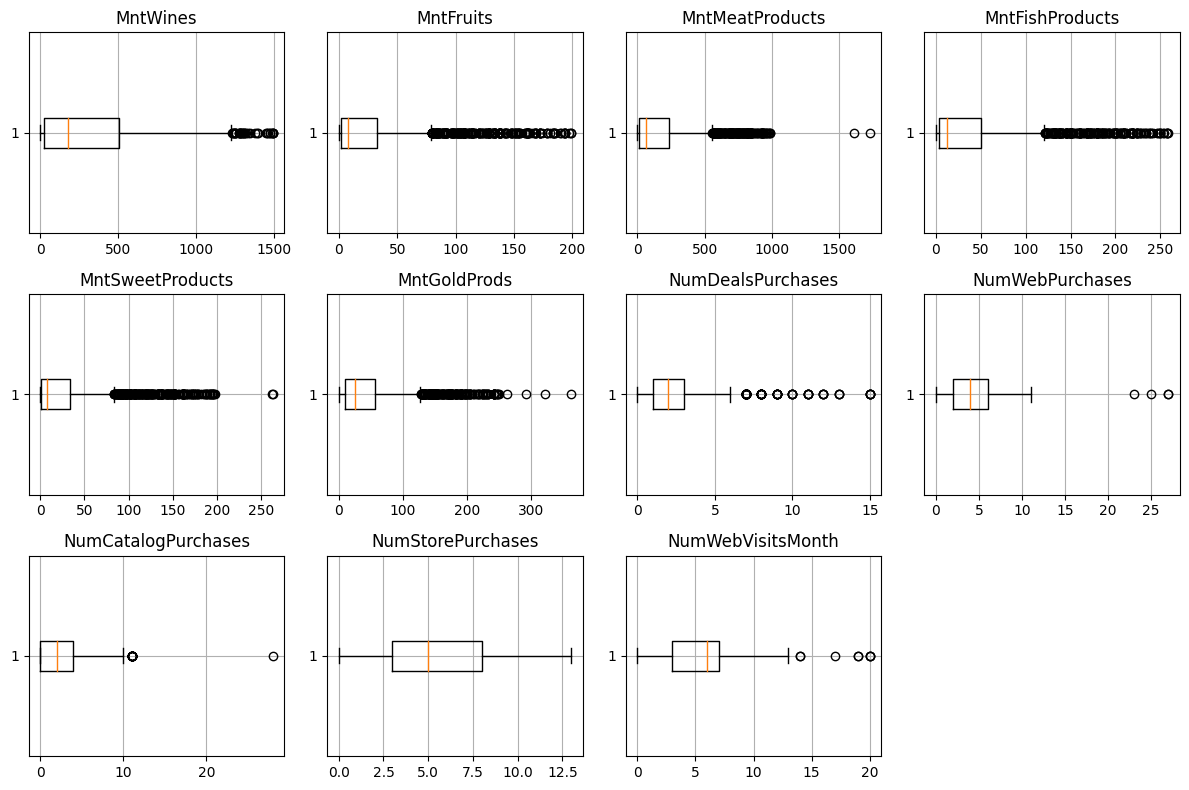

In [ ]:
# List of columns to visualize, focusing on various spending and purchase metrics
columns_to_visualize = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                        'NumWebVisitsMonth']

# Creating a new figure with specified size (12 inches by 8 inches) for the box plots
plt.figure(figsize=(12, 8))

# Looping through each column to create individual box plots
for i, column in enumerate(columns_to_visualize, start=1):
    # Creating a subplot for each box plot (3 rows, 4 columns)
    plt.subplot(3, 4, i)

    # Creating a horizontal box plot for the current column, dropping any NA values
    plt.boxplot(df_super_store[column].dropna(), vert=False)

    # Setting the title for the current box plot to the column name
    plt.title(column)

    # Adding gridlines for better readability of the plot
    plt.grid(True)

# Adjusting layout to prevent overlap of subplots
plt.tight_layout()

# Displaying all the box plots
plt.show()


The box plots reveal a significant presence of outliers across various spending categories and purchase behaviors in the dataset. These outliers, which lie far from the typical range of the data, could potentially skew the analysis and lead to misleading conclusions if not addressed properly.


### Handling Outlier

In [ ]:
# Looping through each column in the list of columns to visualize
for column in columns_to_visualize:
    # Calculating the first quartile (Q1) for the current column
    Q1 = df_super_store[column].quantile(0.25)

    # Calculating the third quartile (Q3) for the current column
    Q3 = df_super_store[column].quantile(0.75)

    # Calculating the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Defining the lower bound for outliers
    lower_bound = Q1 - 1.5 * IQR

    # Defining the upper bound for outliers
    upper_bound = Q3 + 1.5 * IQR

    # Using .loc to modify the DataFrame explicitly by capping values below the lower bound
    df_super_store.loc[df_super_store[column] < lower_bound, column] = lower_bound

    # Using .loc to modify the DataFrame explicitly by capping values above the upper bound
    df_super_store.loc[df_super_store[column] > upper_bound, column] = upper_bound


### Again Visulizing To Check The Handling Of Outlier Has Done Correctly Or Not

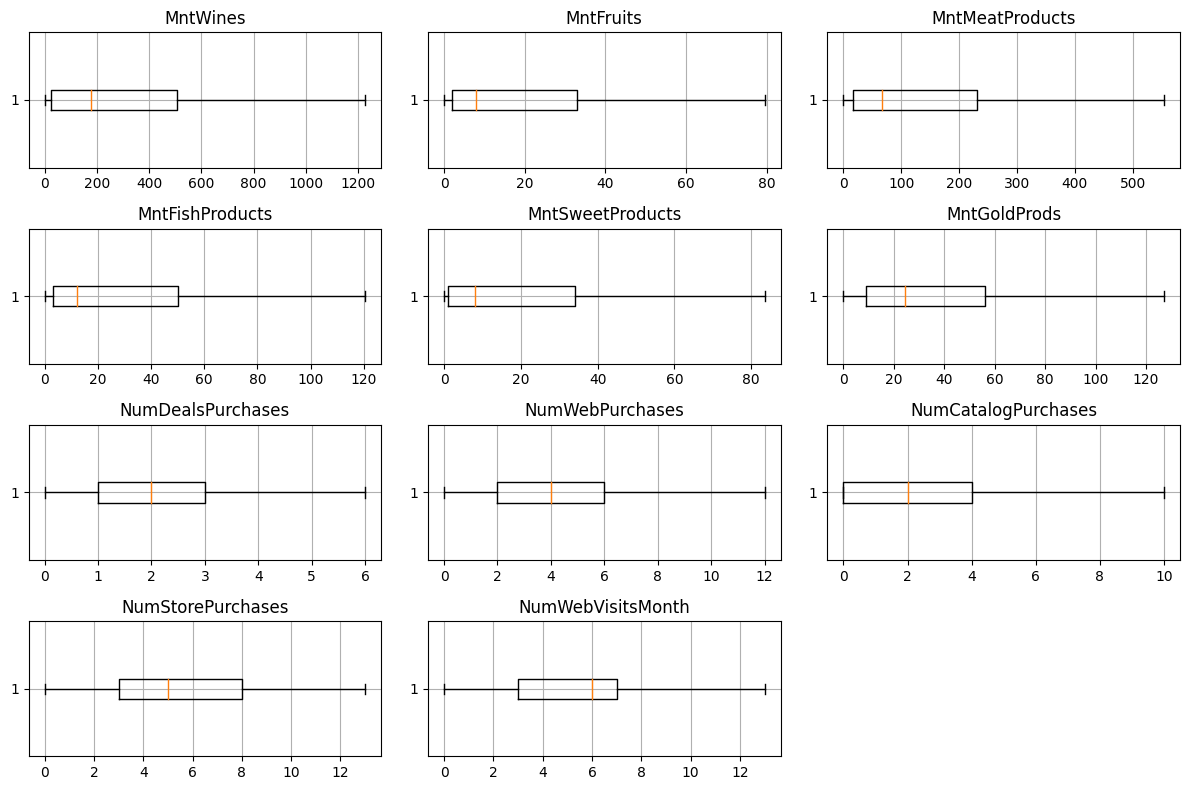

In [ ]:
# Create boxplots for outlier detection
plt.figure(figsize=(12, 8))  # Setting the figure size for the boxplots

# Looping through each column in the list of columns to visualize
for i, column in enumerate(columns_to_visualize, start=1):
    # Creating a subplot for each boxplot (4 rows, 3 columns)
    plt.subplot(4, 3, i)

    # Creating a horizontal boxplot for the current column, dropping any NA values
    plt.boxplot(df_super_store[column].dropna(), vert=False)

    # Setting the title for the current boxplot to the column name
    plt.title(column)

    # Adding gridlines for better readability of the plot
    plt.grid(True)

# Adjusting layout to prevent overlap of subplots
plt.tight_layout()

# Displaying all the boxplots
plt.show()


### We Have Sucessfully Treated The Outliers

## **Discriptive Statistics after handling outliers**

In [ ]:
# Calculate central tendency and dispersion measures (excluding mode)
discriptive_statistics = df_super_store[numerical_column].agg(['mean', 'median', 'var', 'std']).transpose()

# Calculate the mode separately for each numerical column
mode_value = df_super_store[numerical_column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Add the mode values to the central_tendency DataFrame
discriptive_statistics['Mode'] = mode_value

# Rename the index to 'Numerical Column' for clarity
discriptive_statistics.index.name = 'Numerical Column'

# Rename the columns to provide clear descriptions of each statistical measure
discriptive_statistics.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'Mode']

# Display the summary table of descriptive statistics
print(discriptive_statistics)


                             Mean   Median      Variance  Standard Deviation  \
Numerical Column                                                               
Year_Birth            1968.792563   1970.0  1.437682e+02           11.990340   
Income               51630.926971  51381.5  4.244292e+08        20601.679542   
Kidhome                  0.444444      0.0  2.900543e-01            0.538567   
Teenhome                 0.507168      0.0  2.966765e-01            0.544680   
Recency                 49.111111     49.0  8.382700e+02           28.952893   
MntWines               303.124328    176.0  1.097591e+05          331.299047   
MntFruits               21.580645      8.0  7.256842e+02           26.938527   
MntMeatProducts        150.501176     67.0  3.170695e+04          178.064465   
MntFishProducts         32.215726     12.0  1.631996e+03           40.397975   
MntSweetProducts        22.286290      8.0  7.926159e+02           28.153435   
MntGoldProds            39.673723     24

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

Probability of Response = 1 (success): 0.1496
Expected value (mean) for Response: 0.1496


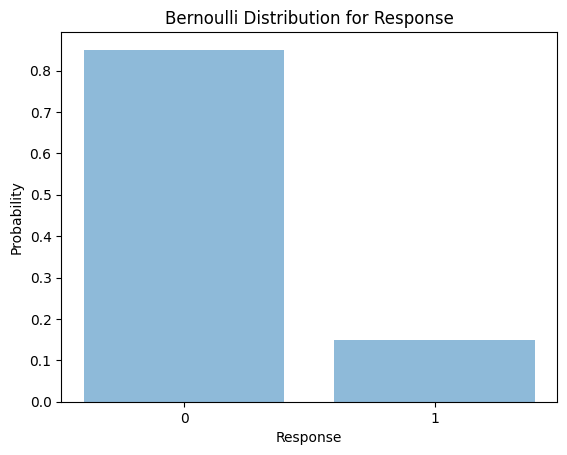

In [ ]:
# Assuming 'Response' is a binary variable (0: No response, 1: Response)
# Calculate the probability of a response (success) based on the dataset
prob_response = df_super_store['Response'].mean()  # Probability of success (response)

# Probability Mass Function (PMF) for Bernoulli distribution (probability of success = prob_response)
prob_success = stats.bernoulli.pmf(1, prob_response)
print(f"Probability of Response = 1 (success): {prob_success:.4f}")

# Expected value (mean) for a Bernoulli distribution
expected_value = stats.bernoulli.mean(prob_response)
print(f"Expected value (mean) for Response: {expected_value:.4f}")

# Visualize Bernoulli distribution
x = [0, 1]  # Possible outcomes for a Bernoulli distribution
pmf_values = stats.bernoulli.pmf(x, prob_response)

plt.bar(x, pmf_values, align='center', alpha=0.5)
plt.xticks(x)
plt.xlabel('Response')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution for Response')
plt.show()

Probability of Complain = 1 (success): 0.0094
Expected value (mean) for Complain: 0.0094


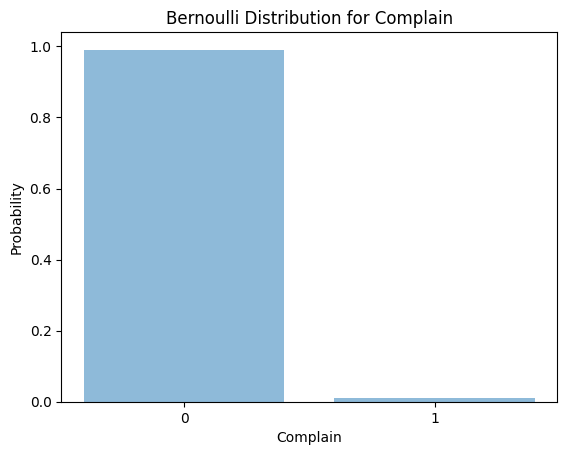

In [ ]:
# Assuming 'Complain' is a binary variable (0: No complaint, 1: Complaint)
# Calculate the probability of a complaint (success) based on the dataset
prob_complain = df_super_store['Complain'].mean()  # Probability of success (complaint)

# Probability Mass Function (PMF) for Bernoulli distribution (probability of success = prob_complain)
prob_success = stats.bernoulli.pmf(1, prob_complain)
print(f"Probability of Complain = 1 (success): {prob_success:.4f}")

# Expected value (mean) for a Bernoulli distribution
expected_value = stats.bernoulli.mean(prob_complain)
print(f"Expected value (mean) for Complain: {expected_value:.4f}")

# Visualize Bernoulli distribution
x = [0, 1]  # Possible outcomes for a Bernoulli distribution
pmf_values = stats.bernoulli.pmf(x, prob_complain)

plt.bar(x, pmf_values, align='center', alpha=0.5)
plt.xticks(x)
plt.xlabel('Complain')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution for Complain')
plt.show()

In [ ]:
# List of continuous variables
continuous_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for column in continuous_columns:
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df_super_store[column].dropna()  # Remove missing values if any

    # Fit a Normal distribution using maximum likelihood estimation (MLE)
    mu, sigma = stats.norm.fit(data)

    # Calculate probabilities and expected value
    prob_100 = stats.norm.cdf(100, mu, sigma)  # Probability of value <= 100
    expected_value = stats.norm.mean(mu, sigma)  # Expected value (mean)

    # Display results for each column
    print(f"Variable: {column}")
    print(f"Estimated Mean (mu): {mu:.2f}")
    print(f"Estimated Standard Deviation (sigma): {sigma:.2f}")
    print(f"Probability of value <= 100: {prob_100:.4f}")
    print(f"Expected Value (mean): {expected_value:.2f}\n")

Variable: MntWines
Estimated Mean (mu): 303.12
Estimated Standard Deviation (sigma): 331.22
Probability of value <= 100: 0.2699
Expected Value (mean): 303.12

Variable: MntFruits
Estimated Mean (mu): 21.58
Estimated Standard Deviation (sigma): 26.93
Probability of value <= 100: 0.9982
Expected Value (mean): 21.58

Variable: MntMeatProducts
Estimated Mean (mu): 150.50
Estimated Standard Deviation (sigma): 178.02
Probability of value <= 100: 0.3883
Expected Value (mean): 150.50

Variable: MntFishProducts
Estimated Mean (mu): 32.22
Estimated Standard Deviation (sigma): 40.39
Probability of value <= 100: 0.9534
Expected Value (mean): 32.22

Variable: MntSweetProducts
Estimated Mean (mu): 22.29
Estimated Standard Deviation (sigma): 28.15
Probability of value <= 100: 0.9971
Expected Value (mean): 22.29

Variable: MntGoldProds
Estimated Mean (mu): 39.67
Estimated Standard Deviation (sigma): 40.06
Probability of value <= 100: 0.9340
Expected Value (mean): 39.67



## **Distribution for products columns**

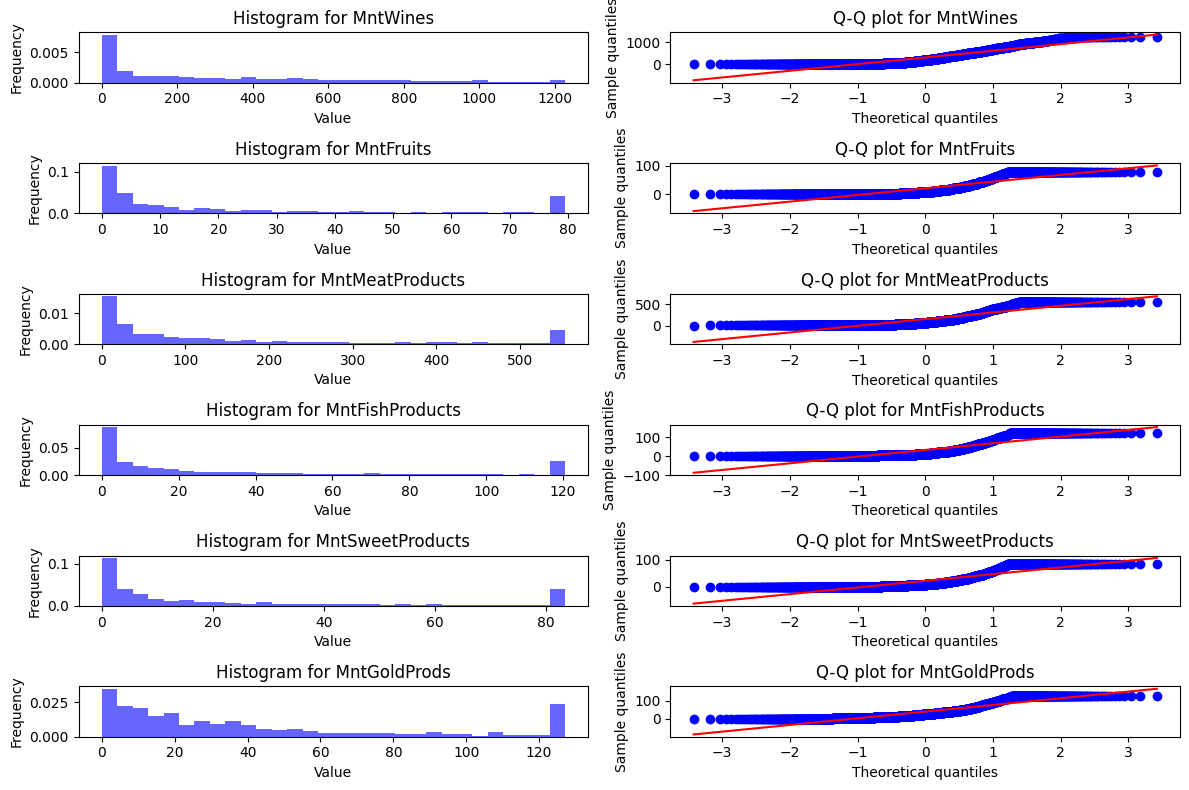

In [ ]:
fig, axes = plt.subplots(nrows=len(continuous_columns), ncols=2, figsize=(12, 8))

for i, column in enumerate(continuous_columns):
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df_super_store[column].dropna()  # Remove missing values if any

    # Fit a Normal distribution using maximum likelihood estimation (MLE)
    mu, sigma = stats.norm.fit(data)

    # Create histogram
    axes[i, 0].hist(data, bins=30, density=True, alpha=0.6, color='blue')
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Create Q-Q plot (quantile-quantile plot)
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].get_lines()[1].set_color('red')  # Highlight the Normal distribution line
    axes[i, 1].set_title(f'Q-Q plot for {column}')
    axes[i, 1].set_xlabel('Theoretical quantiles')
    axes[i, 1].set_ylabel('Sample quantiles')

plt.tight_layout()
plt.show()

In [ ]:
# List of count/frequency variables
count_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']

for column in count_columns:
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df_super_store[column].dropna()  # Remove missing values if any

    # Fit a Poisson distribution using maximum likelihood estimation (MLE)
    mu = data.mean()  # Using sample mean as parameter for Poisson
    fitted_poisson = stats.poisson(mu)

    # Calculate probabilities and expected value
    prob_5 = fitted_poisson.pmf(5)  # Probability of value = 5
    expected_value = fitted_poisson.mean()  # Expected value (mean)

    # Display results for each column
    print(f"Variable: {column}")
    print(f"Estimated Mean (mu) for Poisson: {mu:.2f}")
    print(f"Probability of value = 5: {prob_5:.4f}")
    print(f"Expected Value (mean): {expected_value:.2f}\n")

Variable: NumWebPurchases
Estimated Mean (mu) for Poisson: 4.07
Probability of value = 5: 0.1591
Expected Value (mean): 4.07

Variable: NumCatalogPurchases
Estimated Mean (mu) for Poisson: 2.62
Probability of value = 5: 0.0749
Expected Value (mean): 2.62

Variable: NumStorePurchases
Estimated Mean (mu) for Poisson: 5.81
Probability of value = 5: 0.1654
Expected Value (mean): 5.81

Variable: NumWebVisitsMonth
Estimated Mean (mu) for Poisson: 5.31
Probability of value = 5: 0.1738
Expected Value (mean): 5.31

Variable: NumDealsPurchases
Estimated Mean (mu) for Poisson: 2.22
Probability of value = 5: 0.0486
Expected Value (mean): 2.22



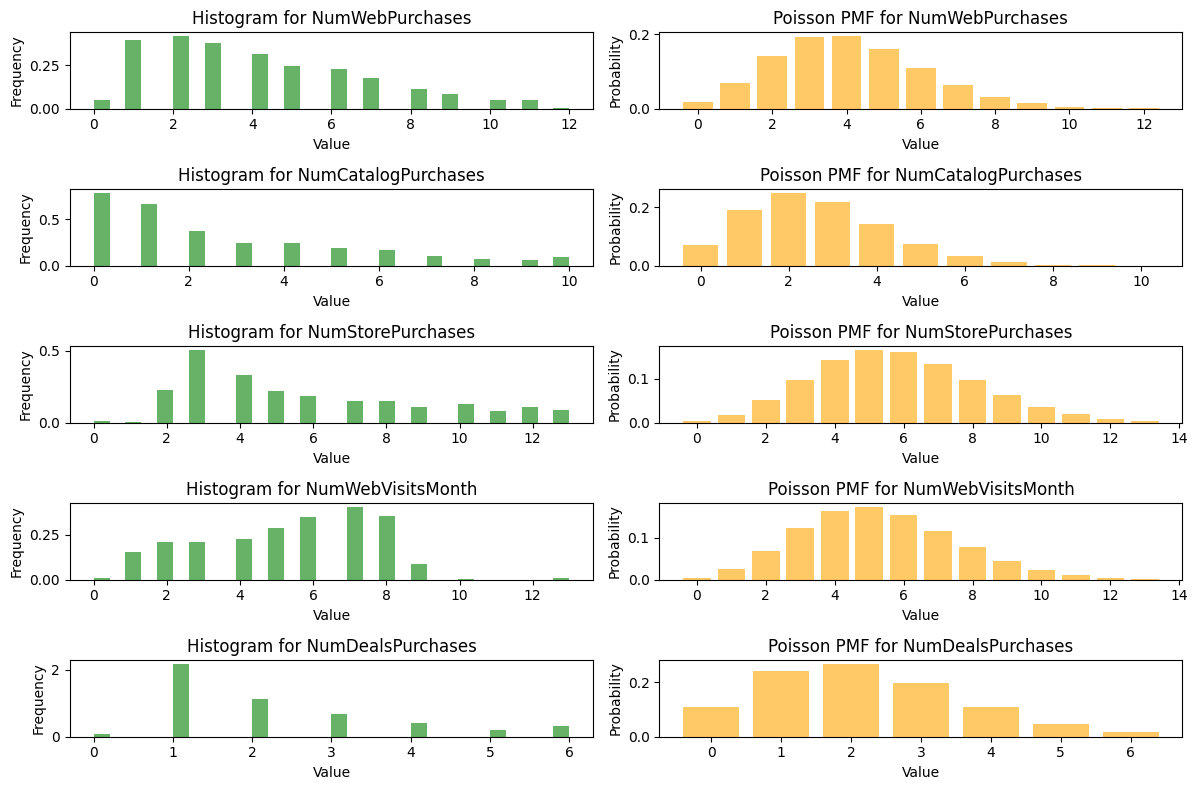

In [ ]:
fig, axes = plt.subplots(nrows=len(count_columns), ncols=2, figsize=(12, 8))

for i, column in enumerate(count_columns):
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df_super_store[column].dropna()  # Remove missing values if any

    # Fit a Poisson distribution using maximum likelihood estimation (MLE)
    mu = data.mean()  # Using sample mean as parameter for Poisson
    fitted_poisson = stats.poisson(mu)

    # Create histogram
    axes[i, 0].hist(data, bins=30, density=True, alpha=0.6, color='green')
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Plot the probability mass function (PMF) of the fitted Poisson distribution
    x = range(0, int(max(data)) + 1)  # Ensure maximum value is converted to an integer
    pmf_values = fitted_poisson.pmf(x)
    axes[i, 1].bar(x, pmf_values, alpha=0.6, color='orange')
    axes[i, 1].set_title(f'Poisson PMF for {column}')
    axes[i, 1].set_xlabel('Value')
    axes[i, 1].set_ylabel('Probability')

plt.tight_layout()
plt.show()

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

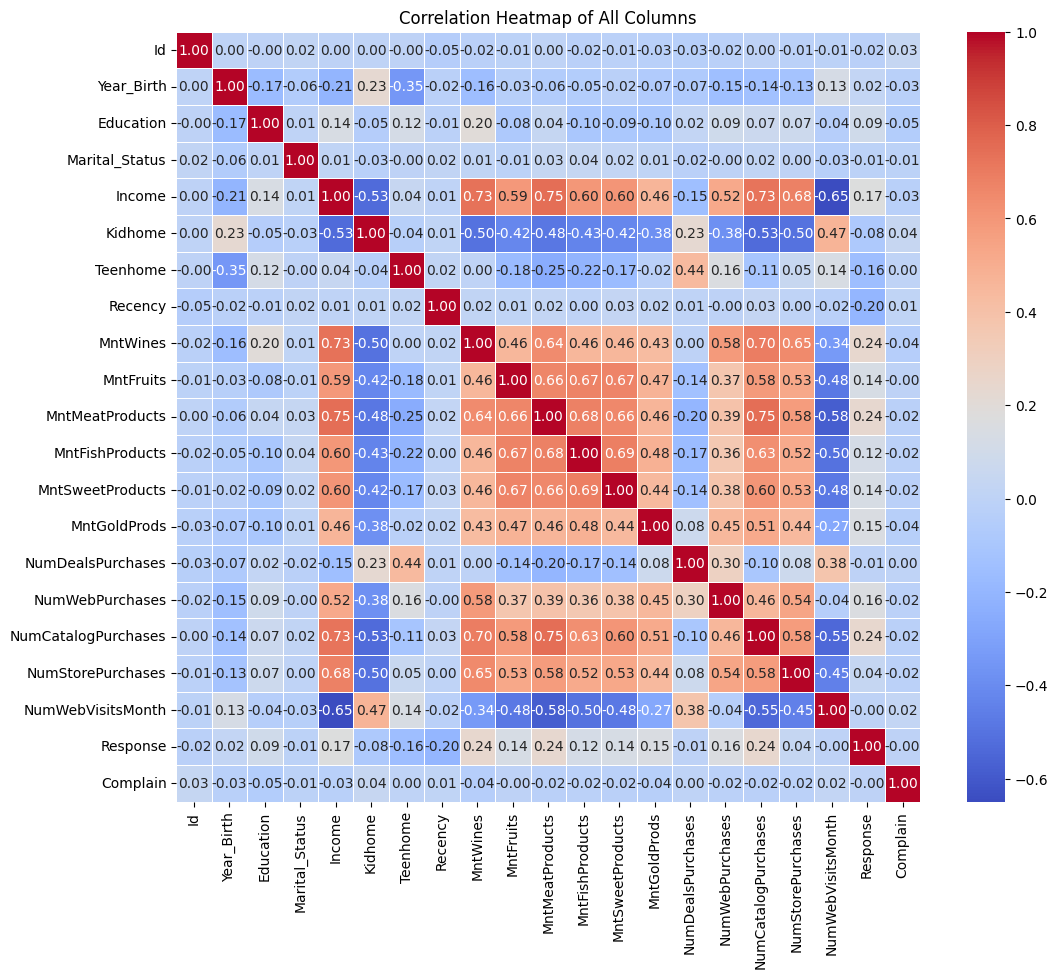

In [ ]:

# Make a copy of the DataFrame to avoid modifying the original data
df_encoded = df_super_store.copy()

# Encode all categorical columns using LabelEncoder
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Create the correlation matrix for all columns (including encoded categorical columns)
corr_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of All Columns')
plt.show()


## **Key insights regarding variables:**


### **1. Income and Spending Patterns:**

There seems to be a positive correlation between 'Income' and spending on 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases'and
       'NumStorePurchases'. Higher-income customers tend to spend more on these categories.

### **2. 'Kidhome' and 'NumWebVisitsMonth' (correlation = 0.47):**

* A correlation of 0.47 indicates a moderate positive correlation between the    number of children at home ('Kidhome') and the number of web visits per month ('NumWebVisitsMonth').
* This suggests that customers with more children at home are moderately more likely to make a higher number of web visits each month. The positive correlation implies that as the number of children at home increases, the number of web visits tends to increase as well.

### **3. 'Teenhome' and 'NumDealsPurchases':**

A correlation of 0.44 between 'Teenhome' and 'NumDealsPurchases' indicates a moderate positive association, suggesting that customers with more teenagers at home tend to have a higher number of deals purchases.

### **4. 'NumDealsPurchases' and 'NumWebPurchases' (correlation = 0.30):**

* A correlation of 0.30 indicates a positive, but relatively weak, correlation between the number of deals purchases ('NumDealsPurchases') and the number of web purchases ('NumWebPurchases').
* This suggests that customers who engage in more deals purchases are somewhat more likely to make more web-based purchases. However, the correlation is not very strong, and other factors may also influence the relationship.

### **5.'NumDealsPurchases' and 'NumWebVisitsMonth' (correlation = 0.38):**

* A correlation of 0.38 indicates a positive, moderate correlation between the number of deals purchases ('NumDealsPurchases') and the number of web visits per month ('NumWebVisitsMonth').
* This suggests that customers who make a higher number of deals purchases are moderately more likely to have a higher number of web visits each month. The positive correlation implies that as the number of deals purchases increases, the number of web visits tends to increase as well.

### **6. 'NumWebPurchases' and 'Income' (correlation = 0.52):**

* A correlation of 0.52 indicates a moderate positive correlation between the number of web purchases ('NumWebPurchases') and the income of customers ('Income').
* This suggests that customers with higher incomes tend to make a higher number of web-based purchases. The positive correlation implies that as income increases, the number of web purchases also tends to increase.

### **7.'NumWebPurchases' and 'MntWines' (correlation = 0.58):**

* A correlation of 0.58 indicates a moderate to strong positive correlation between the number of web purchases ('NumWebPurchases') and spending on wines ('MntWines').
* This implies that customers who make a higher number of web purchases are also likely to spend more on wines, fruits, meat, fish products, sweetproducts, gold products. The positive correlation suggests a concurrent increase in both variables.
* Peolple who purchase through web also tend to take more deals on purchases.  

### **8.'NumWebPurchases' and 'NumCatalogPurchases' (correlation = 0.46):**

* A correlation of 0.46 indicates a moderate positive correlation between the number of web purchases ('NumWebPurchases') and the number of catalog purchases ('NumCatalogPurchases').
* This suggests that customers who make more web purchases also tend to make a moderately higher number of catalog purchases. The positive correlation implies a tendency for these two variables to increase together.

### **9.'NumWebPurchases' and 'NumStorePurchases' (correlation = 0.54):**

* A correlation of 0.54 indicates a moderate positive correlation between the number of web purchases ('NumWebPurchases') and the number of store purchases ('NumStorePurchases').
* This suggests that customers who make more web purchases are also likely to make a moderately higher number of in-store purchases. The positive correlation implies a concurrent increase in both variables.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

### Actionable recommendations based on customer behavior analysis.


### 1. **Targeted Marketing Campaigns:**


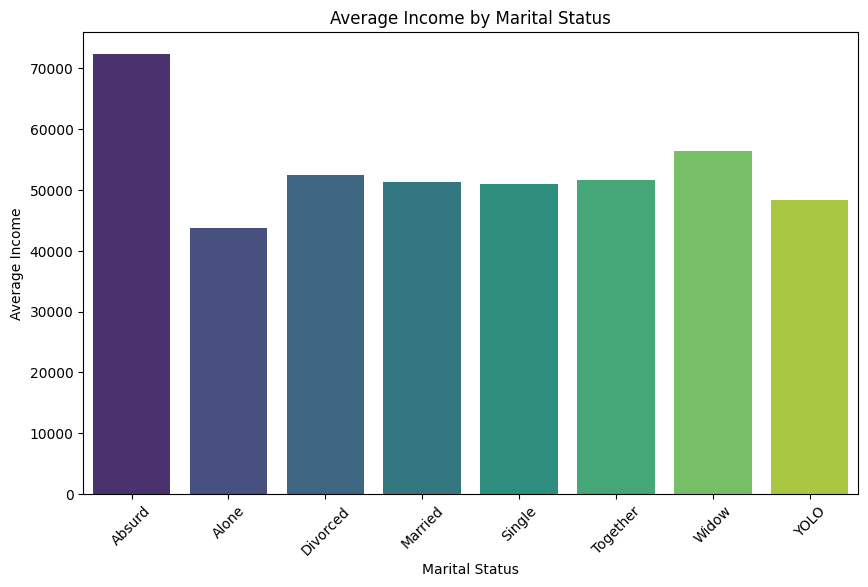

In [ ]:
# Calculate average income for each marital status category
avg_income_by_marital_status = df_super_store.groupby('Marital_Status')['Income'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='Income', data=avg_income_by_marital_status, palette='viridis')
plt.title('Average Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

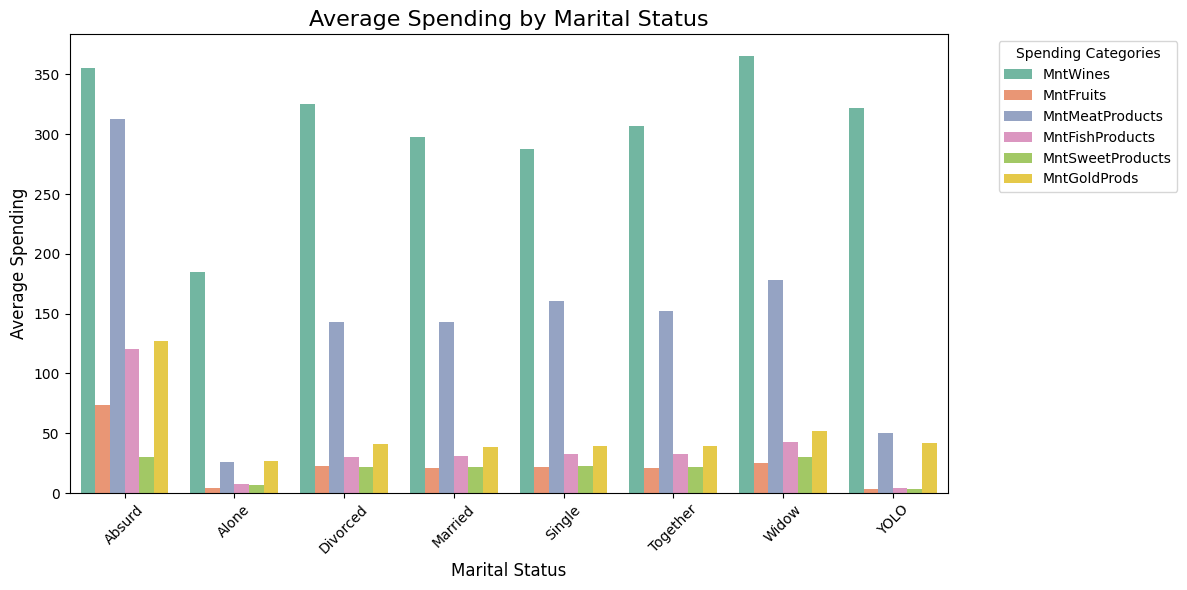

In [ ]:
# Selecting spending columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds']

# Calculate average spending for each marital status category across all spending categories
avg_spending_by_marital = df_super_store.groupby('Marital_Status')[spending_columns].mean().reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn
avg_spending_melted = avg_spending_by_marital.melt(id_vars='Marital_Status',
                                                   value_vars=spending_columns,
                                                   var_name='Spending_Category',
                                                   value_name='Average_Spending')

# Define colors for each spending category using a different palette
colors = sns.color_palette('Set2', n_colors=len(spending_columns))

plt.figure(figsize=(12, 6))

# Plotting with seaborn barplot using the melted DataFrame
sns.barplot(x='Marital_Status', y='Average_Spending', hue='Spending_Category',
            data=avg_spending_melted, palette=colors)

# Adding title and labels
plt.title('Average Spending by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend(title='Spending Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insights from the Chart:

1. **Highest Spending by Marital Status:**
   - **Widow:** Contrary to the initial overview, the `Widow` status shows a significant expenditure on `MntWines`, indicating a strong preference or a high-value market segment for wine products within this group.
   - **Married and Together:** These groups still show high spending across multiple categories, particularly in `MntMeatProducts`, reflecting a potential focus on family or bulk purchasing habits.

2. **Spending Trends:**
   - **YOLO:** The `YOLO` marital status displays substantial spending on wines, possibly reflecting a lifestyle-oriented or indulgence-driven purchasing behavior.
   - **Alone:** This category shows relatively lower spending across the board, which could highlight a potential area for market penetration or targeted campaigns to increase spending.

3. **Product Popularity:**
   - `MntWines` continues to be a standout category in terms of spending, now notably high among the `Widow` and `YOLO` statuses, suggesting it is a popular choice across varied demographic profiles.

### Recommendations and Business Strategies:

1. **Targeted Marketing:**
   - **Enhanced Focus on Widows for Wine Products:** Given the high spending by the `Widow` category on wines, targeted marketing campaigns, possibly highlighting luxury or exclusive wine selections, could be highly effective.
   - **Promotions for Married and Together:** Continue leveraging the buying power of the `Married` and `Together` categories with promotions on meat products and possibly bundle offers that cater to family needs.

2. **Product Diversification:**
   - **Wine Varietal Expansion:** Considering the high expenditure on wines across several statuses, expanding the variety, including premium and exclusive batches, could attract more customers from the `Widow` and `YOLO` segments.
   - **Budget-Friendly Options:** For the `Alone` demographic, introducing budget-friendly options in popular categories like fruits and sweet products may help increase their spending.

3. **Customer Engagement:**
   - **Loyalty Programs for Seniors:** Considering the `Widow` demographic's spending habits, a loyalty program focusing on senior customers could foster brand loyalty and increase repeat purchases.
   - **Event Marketing:** Hosting wine-tasting events or social gatherings could particularly resonate with the `Widow` and `YOLO` categories, combining social interaction with product promotion.


### 2. **Promotions and Deals:**

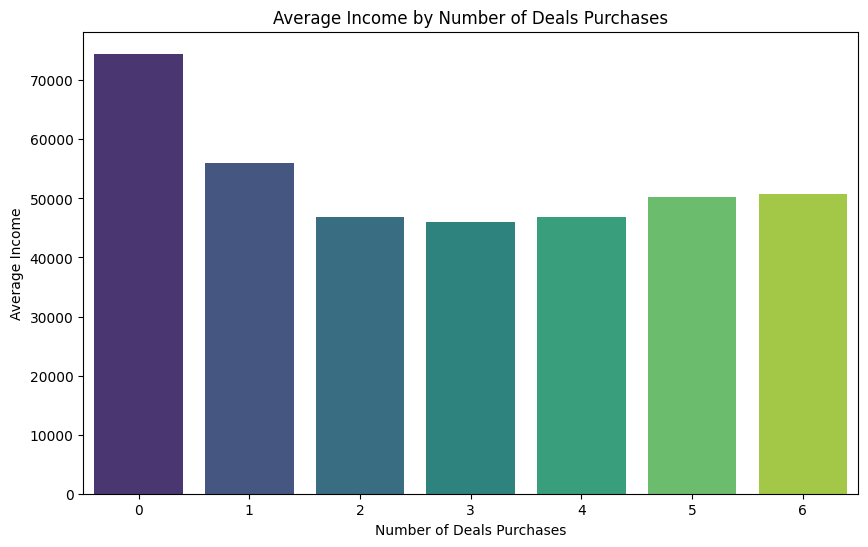

In [ ]:
selected_columns = ['Income', 'NumDealsPurchases']

# Select relevant columns
df_selected = df_super_store[selected_columns]

# Calculate mean income for each category of NumDealsPurchases
mean_income = df_selected.groupby('NumDealsPurchases').mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='NumDealsPurchases', y='Income', data=mean_income, palette='viridis')
plt.title('Average Income by Number of Deals Purchases')
plt.xlabel('Number of Deals Purchases')
plt.ylabel('Average Income')
plt.show()


The graph provided displays the average income categorized by the number of deals purchases, from 0 to 6. Here are the key insights and strategic implications drawn from this visualization:

### Insights from the Chart:
1. **Higher Income with Fewer Deals Purchases:**
   - The highest average income is observed among customers who make no deal purchases (0 deals), which suggests that customers with higher income levels may not be as attracted to deal-based purchasing.
   - There is a noticeable decline in average income as the number of deals purchases increases from 0 to 1.

2. **Stabilization in Income Levels:**
   - From 2 to 6 deals purchases, the average income seems to stabilize and shows a slight increasing trend as the number of deals purchases increases. This could indicate that customers who frequently engage in deal purchases have relatively similar income levels, which may slightly increase as they become more engaged.

3. **Income Rebound:**
   - There is a slight rebound in average income for customers making 6 deals purchases compared to those making 5. This could suggest a specific segment of higher-income customers who are particularly savvy in seeking out numerous deals.

### Strategic Recommendations:
1. **Targeted Marketing:**
   - **High-Income Non-Dealers:** Develop premium offers or loyalty programs that appeal to high-income customers who do not typically engage in deal purchases. These customers may be attracted to exclusivity rather than discounts.
   - **Mid-Level Income Dealers:** Since income levels stabilize among those making 2 to 6 deals purchases, marketing campaigns can focus on offering more attractive deals to retain this customer base and encourage higher-frequency purchases.

2. **Customer Segmentation:**
   - **Segment by Purchase Behavior:** Use CRM data to segment customers not only by income but also by their response to deals. Tailor communications and promotions to match the purchasing patterns and income characteristics of each segment.

3. **Incentive Programs:**
   - **Rewards for Frequent Deal Shoppers:** Introduce or enhance rewards programs that incentivize frequent deal purchases, potentially increasing customer loyalty among those in the 2-6 deals purchase range.
   - **Exclusive Deals for High-Volume Purchasers:** Offer exclusive deal access or special promotions for those who make 5 or more deals purchases, catering to the observed income rebound in this group.

4. **Analysis and Adjustment:**
   - **Monitor and Analyze Trends:** Regularly analyze the trends in deal purchases relative to income changes. Adjust marketing strategies based on real-time data to ensure they remain effective and relevant to each income bracket.

5. **Cross-Selling Opportunities:**
   - **Cross-Promote Products:** For customers engaged in deals, cross-promote related products that may not be on deal but are complementary, potentially increasing the overall basket size.


### 3. **Website Optimization:**

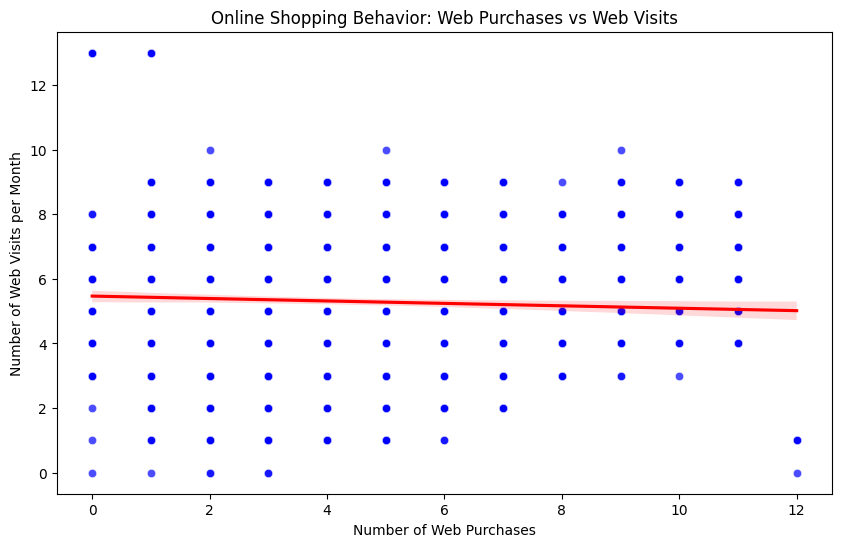

In [ ]:
selected_columns = ['NumWebPurchases', 'NumWebVisitsMonth']

# Select relevant columns
df_selected = df_super_store[selected_columns]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebPurchases', y='NumWebVisitsMonth', data=df_selected, alpha=0.7, color='blue')
sns.regplot(x='NumWebPurchases', y='NumWebVisitsMonth', data=df_selected, scatter=False, color='red')
plt.title('Online Shopping Behavior: Web Purchases vs Web Visits')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Number of Web Visits per Month')
plt.show()

### Insights From Chart:
1. **Decreasing Engagement and Purchases:**
   - The chart shows a negative relationship where both web visits and web purchases decrease together. This suggests that higher initial visits do not necessarily translate to higher purchases, and overall engagement and purchasing behavior are declining.

2. **Ineffective Conversion:**
   - High web visits not converting into equivalent or increasing web purchases could indicate issues with website engagement, user experience, or product offerings. This could also suggest that visitors are not finding what they're looking for or are not sufficiently engaged to make a purchase.

3. **Potential Issues with User Experience:**
   - The decrease might indicate that users are losing interest or becoming frustrated with the site's navigation, content, or the checkout process. There might also be external factors affecting user behavior, such as market competition or changes in consumer preferences.

### Recommendations and Business Strategies:
1. **Enhance User Engagement:**
   - **Improve Site Usability:** Investigate areas of the website where users might be dropping off using tools like heat maps or session recordings. Simplify navigation, improve product descriptions, and enhance overall site performance.
   - **Optimize Mobile Experience:** Ensure the mobile version of the site is optimized for user engagement, considering the increasing trend of mobile commerce.

2. **Increase Conversion Rates:**
   - **Revamp the Checkout Process:** Streamline the checkout process to make it quicker and more user-friendly. Reduce the number of steps required to complete a purchase.
   - **Effective Call-to-Action:** Use clear and compelling calls to action (CTAs) that guide users towards making purchases.

3. **Personalization and Targeted Marketing:**
   - **Personalized Recommendations:** Implement advanced analytics to provide personalized product recommendations based on user behavior and preferences.
   - **Segmented Marketing Campaigns:** Create marketing campaigns that are tailored to different segments of visitors, particularly focusing on converting high-visit, low-purchase users.

4. **Content Strategy:**
   - **Engaging Content:** Develop content that addresses user needs and queries. Use blogs, videos, and tutorials to engage users, keeping them on the site longer and encouraging purchases.
   - **SEO and Content Marketing:** Enhance content strategy to improve organic reach and draw in more visitors who are likely to purchase.

5. **Customer Feedback and Market Research:**
   - **Gather User Feedback:** Regularly collect and analyze customer feedback to understand barriers to purchase.
   - **Competitive Analysis:** Conduct a thorough market and competitive analysis to understand how competitors are succeeding in converting visits to purchases.



### 4. **Segment-Specific Communication:**

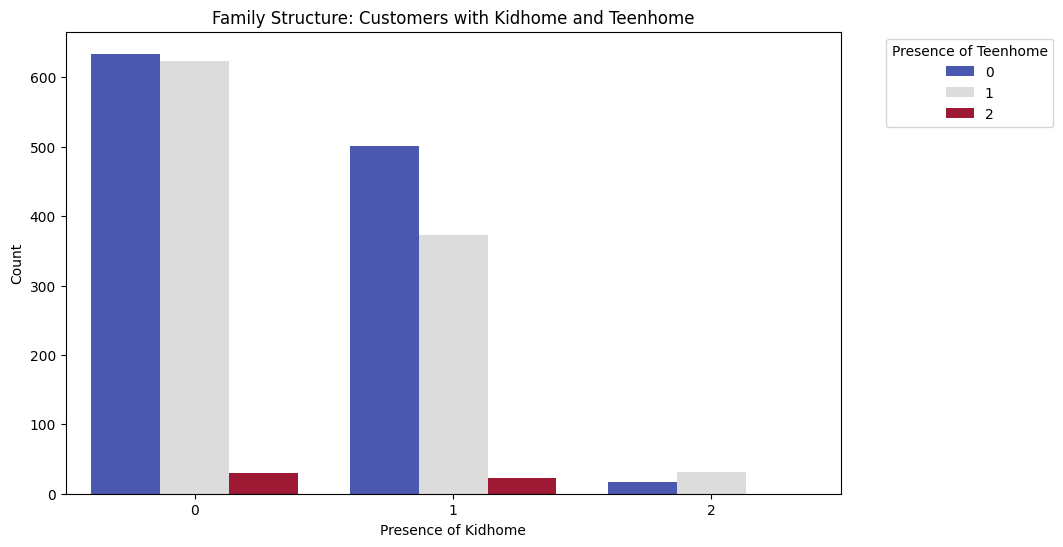

In [ ]:
selected_columns = ['Kidhome', 'Teenhome']

# Select relevant columns
df_selected = df_super_store[selected_columns]

# Count plot for family structure
plt.figure(figsize=(10, 6))
sns.countplot(x='Kidhome', data=df_selected, hue='Teenhome', palette='coolwarm')
plt.title('Family Structure: Customers with Kidhome and Teenhome')
plt.xlabel('Presence of Kidhome')
plt.ylabel('Count')
plt.legend(title='Presence of Teenhome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights From The Chart:
1. **Customers without Children (Kidhome = 0)**:
   - The majority of customers do not have children, as represented by the first cluster of bars.
   - Most of these customers either do not have teenagers (represented by the blue bar, "Teenhome = 0") or have one teenager (gray bar, "Teenhome = 1"). Very few have two teenagers (red bar, "Teenhome = 2").

2. **Customers with One Child (Kidhome = 1)**:
   - The second cluster shows that a significant number of customers have one child, but again, most of them either do not have teenagers or have one teenager.
   - There's a small segment of customers with one child and two teenagers.

3. **Customers with Two Children (Kidhome = 2)**:
   - This is the smallest segment, with very few customers having two children.
   - The majority of these families do not have any teenagers.

### Recommendations and Business Strategies:
1. **Target Marketing for Families without Children or Teenagers**:
   - Since a large proportion of your customer base does not have children, you could tailor marketing strategies to appeal to single adults, couples, or older families.
   - Promotions could focus on products or services that appeal to this demographic, such as luxury items, travel packages, or personal care.

2. **Appeal to Families with One Child**:
   - The second largest group consists of families with one child. Developing products or services that cater to single-child families, like education-related services, child development programs, or experiences that are family-oriented, may drive more engagement.
   - Personalized offers or family-based loyalty programs could be effective for this segment.

3. **Expanding to Teenager-Focused Products**:
   - While most families do not have teenagers, those that do should not be neglected. Offering products like tech gadgets, sports equipment, and educational tools tailored for teenagers could create new revenue streams.
   - Consider targeted digital campaigns for families with teens, such as back-to-school promotions or youth-focused entertainment products.

4. **Upsell Opportunities for Larger Families**:
   - Although the number of customers with two children is small, larger families tend to have higher spending power. Bundled offers or discounts on family packages could be designed to encourage bigger purchases from this segment.

5. **Loyalty Programs**:
   - Since the customer base is diverse, a tiered loyalty program based on family structure could encourage repeat business. For example, families with children could earn rewards for kid-focused purchases, while adult-only households might be offered perks for entertainment or luxury purchases.

### **5. In-Store Experience Enhancement:**


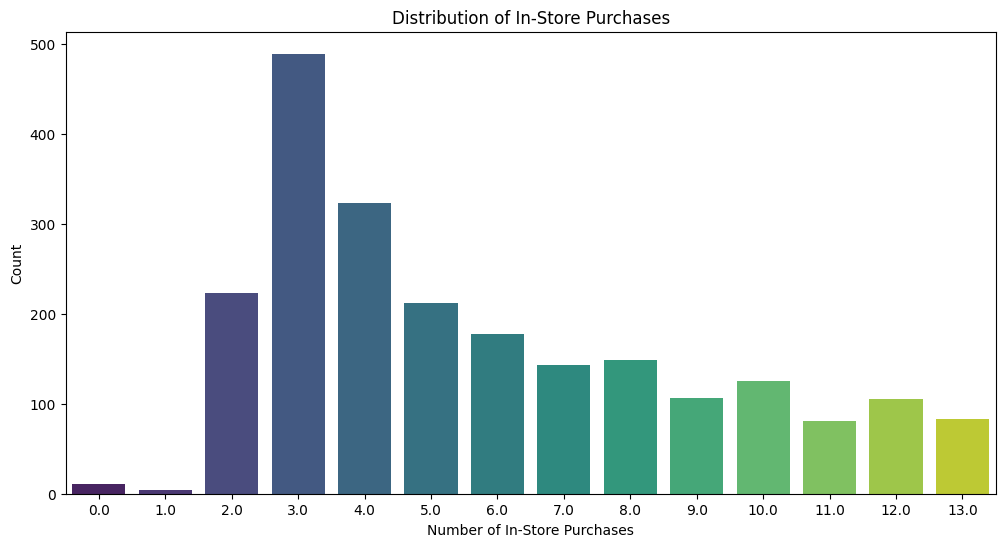

In [ ]:
selected_columns = ['NumStorePurchases', 'Response']

# Select relevant columns
df_selected = df_super_store[selected_columns]

# Count plot for in-store purchases
plt.figure(figsize=(12, 6))
sns.countplot(x='NumStorePurchases', data=df_selected, palette='viridis')
plt.title('Distribution of In-Store Purchases')
plt.xlabel('Number of In-Store Purchases')
plt.ylabel('Count')
plt.show()


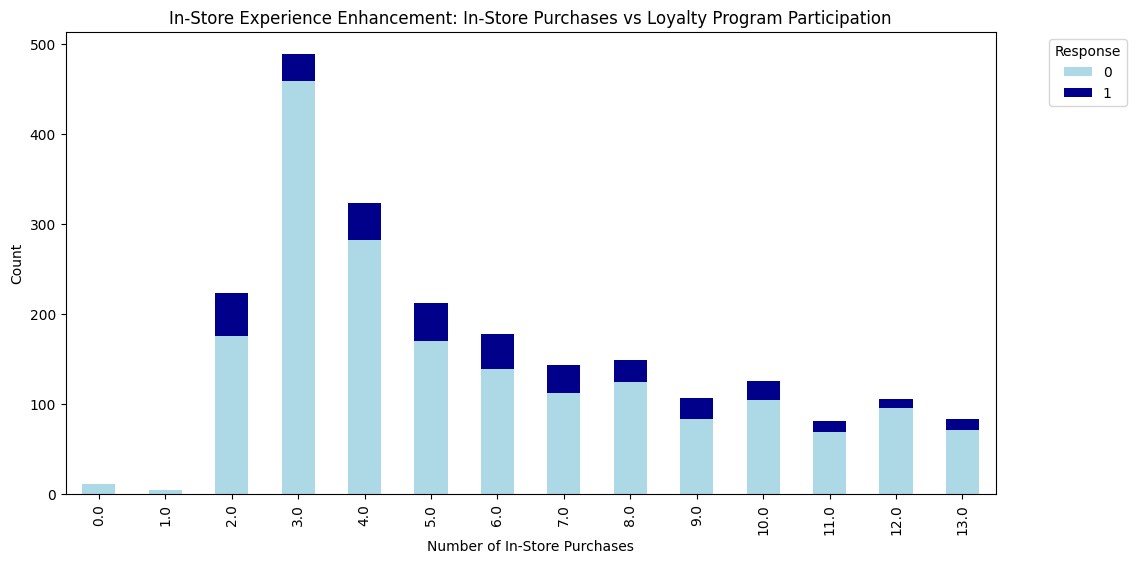

In [ ]:
# Bar plot for participation in loyalty programs based on in-store purchases
loyalty_counts = df_selected.groupby('NumStorePurchases')['Response'].value_counts().unstack()
loyalty_counts.plot(kind='bar', stacked=True, color=['lightblue', 'darkblue'], figsize=(12, 6))
plt.title('In-Store Experience Enhancement: In-Store Purchases vs Loyalty Program Participation')
plt.xlabel('Number of In-Store Purchases')
plt.ylabel('Count')
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Insights from the Charts:

#### 1. **Distribution of In-Store Purchases (First Chart)**:
   - The most frequent number of in-store purchases is between 2 and 4, with a sharp peak at 3 purchases.
   - The number of customers decreases progressively as the number of in-store purchases increases beyond 4, with very few customers making 9 or more purchases.
   - A significant number of customers make between 0 and 1 purchases, indicating either low engagement or new/occasional customers.

#### 2. **In-Store Purchases vs Loyalty Program Participation (Second Chart)**:
   - The majority of customers who make in-store purchases are **not** part of a loyalty program (light blue bars).
   - However, a small portion of customers (dark blue) across almost all purchase frequencies are part of a loyalty program, suggesting that there is some loyalty program engagement but room for significant improvement.
   - The highest proportion of loyalty program participants is among those who make 2 or 3 purchases, but this still represents a minority.

### Strategy and Recommendations:

#### 1. **Increase Engagement for Low-Activity Customers (0-1 Purchases)**:
   - **Targeted Promotions**: Customers making 0 or 1 in-store purchases represent a disengaged or occasional group. Introduce targeted promotions (e.g., discounts, limited-time offers) to incentivize them to make more frequent purchases.
   - **Personalized Communication**: Utilize personalized marketing emails or SMS messages to engage these customers. Highlight the benefits of making more frequent purchases or joining a loyalty program.
   - **First-Time Purchase Offers**: For customers with zero purchases, consider introducing “first-time shopper” deals or welcome discounts to convert them into regular shoppers.

#### 2. **Maximize Potential of Customers with 2-4 Purchases**:
   - **Loyalty Program Enrollment**: Most customers in this range are not part of a loyalty program. Offer them incentives to join, such as bonus points for signing up or tiered rewards for repeat purchases.
   - **Exclusive Offers**: Encourage these customers to transition into loyalty program members by offering exclusive discounts or early access to sales, which could boost their purchasing behavior.
   - **Cross-Selling and Upselling**: Customers with moderate purchase behavior (2-4 purchases) could be encouraged to buy more through effective cross-selling or upselling. Bundle offers or complementary product suggestions may work well for this group.

#### 3. **Boost Participation in the Loyalty Program**:
   - **Revamp Loyalty Program Structure**: The current loyalty program participation is low across all segments. Redesign the program to make it more appealing with better rewards, tier-based benefits, or personalized incentives.
   - **Gamification**: Introduce gamified elements such as badges, levels, or challenges that encourage repeat purchases and increase engagement with the loyalty program.
   - **Loyalty Program for Frequent Buyers**: Customers making 7 or more purchases show a drop in loyalty program participation, despite high engagement in-store. Introduce exclusive rewards or personalized perks for high-frequency buyers to reward their loyalty and encourage them to join the program.

#### 4. **Engage High-Volume Shoppers (5+ Purchases)**:
   - **Premium Membership Options**: Consider launching a premium membership or VIP program for high-volume shoppers (customers making 5+ purchases). Offering exclusive benefits (like early product releases, personal shopping assistants, or higher reward points) could incentivize these frequent buyers to remain loyal.
   - **Custom Rewards**: Tailor rewards to these customers’ preferences by analyzing their purchasing behavior and sending personalized offers. Offering unique products or experiences could also drive more engagement.

#### 5. **Enhance In-Store Experience**:
   - **Personalized Shopping Experience**: Create a more engaging in-store experience by offering personalized services for loyalty program members. For example, store associates could provide personalized product recommendations based on customer data.
   - **Improve Customer Journey**: Consider improving the customer journey by reducing friction points in-store, such as faster checkouts for loyalty members or dedicated shopping times for premium members.



## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍